In [1]:
import pandas as pd
import matplotlib.pylab as plt
import surprise
import numpy as np
from surprise import Reader
from surprise import Dataset

In [2]:
# Read csv
trade_df = pd.read_csv("./data/trade.csv", encoding="utf-8", parse_dates=['ISSUEDT'],
                       dtype={'HSCD': str, "QTY": float, 'BYRADDR2': str, 'SPLYADDR2': str})

In [3]:
trade_df = trade_df[['BYRORGNM1', 'SPLYORGNM1']]

In [44]:
df = trade_df.groupby(['BYRORGNM1', 'SPLYORGNM1']).agg('size').reset_index()

In [45]:
df.columns = ['byr', 'spl', 'trd_cnt']

In [ ]:
df.groupby('byr').agg('size').sort_values().reset_index().groupby(0).agg('size').sum()

In [ ]:
df.groupby('byr').agg('size').sort_values().reset_index().groupby(0).agg('size').loc[50:].sum()

In [ ]:
b = df['byr'].value_counts() >= 5
b = b[b].index.tolist()

In [ ]:
s = df['spl'].value_counts() >= 5
s = s[s].index.tolist()

In [6]:
b = df['byr'].value_counts() >= 5
b = b[b].index.tolist()
df = df.loc[df['byr'].isin(b)].reset_index(drop=True)

In [ ]:
df = df.loc[(df['byr'].isin(b)) & (df['spl'].isin(s))].reset_index(drop=True)

In [7]:
df.head(10)

,byr,spl,trd_cnt
0,(사)경남농수산식품수출협회,(주)에코맘의산골이유식 농업회사법인,10
1,(사)경남농수산식품수출협회,국대씨푸드,2
2,(사)경남농수산식품수출협회,농업회사법인(주)강림오가닉,2
3,(사)경남농수산식품수출협회,슬로푸드 주식회사 농업회사법인,4
4,(사)경남농수산식품수출협회,아로니아상사 영농조합법인,2
5,(사)경남농수산식품수출협회,우포바이오푸드영농조합법인,1
6,(사)경남농수산식품수출협회,재단법인 남해마늘연구소,1
7,(사)경남농수산식품수출협회,청양식품영농조합법인,6
8,(유)브이피에이치아이,(주)디와이시,367
9,(유)브이피에이치아이,(주)오토탑,43


In [ ]:
df.groupby('trd_cnt').agg('size').sum()

In [ ]:
df.groupby('trd_cnt').agg('size').loc[111:].sum()

In [15]:
import sys
rating = {1:[1,1], 2:[2,2], 3:[3,3], 4:[4,4], 5:[5,6],
          6:[7,9], 7:[10,16], 8:[17,35], 9:[30,110], 10:[111,sys.maxsize]}

In [16]:
for i in rating:
    df.loc[(df.trd_cnt >= rating[i][0]) & (df.trd_cnt <= rating[i][1]), 'trd_cnt'] = i    

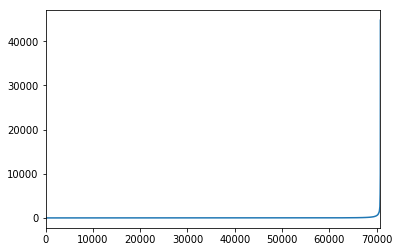

In [46]:
df.sort_values('trd_cnt').trd_cnt.reset_index(drop=True)[:].plot()

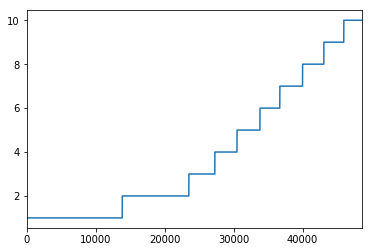

In [17]:
df.sort_values('trd_cnt').trd_cnt.reset_index(drop=True).plot()

In [18]:
df.head()

,byr,spl,trd_cnt
0,(사)경남농수산식품수출협회,(주)에코맘의산골이유식 농업회사법인,7
1,(사)경남농수산식품수출협회,국대씨푸드,2
2,(사)경남농수산식품수출협회,농업회사법인(주)강림오가닉,2
3,(사)경남농수산식품수출협회,슬로푸드 주식회사 농업회사법인,4
4,(사)경남농수산식품수출협회,아로니아상사 영농조합법인,2


In [19]:
reader = Reader(rating_scale=(1,10))
data = Dataset.load_from_df(df, reader)

In [ ]:
from surprise.model_selection import cross_validate
bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
}
algo = surprise.BaselineOnly(bsl_options)
cross_validate(algo, data)

In [56]:
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import SVDpp
from surprise import SlopeOne
from surprise import NMF
from surprise import NormalPredictor
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import BaselineOnly
from surprise import CoClustering

benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['FCP'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_fcp')   

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


,fit_time,test_fcp,test_time
Algorithm,,,
CoClustering,2.125163,0.348788,0.112499
SVDpp,18.627109,0.406891,0.396810
KNNBaseline,0.255392,0.411130,0.136191
SVD,1.372933,0.412427,0.078383
BaselineOnly,0.083698,0.413987,0.059343
NMF,3.210948,0.420215,0.109539
KNNWithMeans,0.214156,0.439664,0.170497
KNNWithZScore,0.310368,0.448785,0.129698
SlopeOne,7.640404,0.455148,0.271721


In [ ]:
%%time
algo = surprise.SVD(n_factors=100)
cross_validate(algo, data)["test_mae"].mean()

In [48]:
from surprise.model_selection import train_test_split
from surprise import accuracy
trainset, testset = train_test_split(data, test_size=0.25)
algo = surprise.SVD(n_factors=100)
predictions = algo.fit(trainset).test(testset)
accuracy.fcp(predictions)

FCP:  0.4219


0.4219035069915893

In [49]:
def get_Iu(uid):
    """Return the number of items rated by given user
    
    Args:
        uid: The raw id of the user.
    Returns:
        The number of items rated by the user.
    """
    
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError:  # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """Return the number of users that have rated given item
    
    Args:
        iid: The raw id of the item.
    Returns:
        The number of users that have rated the item.
    """
    
    try:
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:  # item was not part of the trainset
        return 0

rcm_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])    
rcm_df['Iu'] = rcm_df.uid.apply(get_Iu)
rcm_df['Ui'] = rcm_df.iid.apply(get_Ui)
rcm_df['err'] = abs(rcm_df.est - rcm_df.rui)

In [50]:
rcm_df.sort_values(by='err').head(20)

,uid,iid,rui,est,details,Iu,Ui,err
11724,쌍용자동차(주),대한칼소닉(주),10.0,10.000000,{'was_impossible': False},68,5,0.000000
1272,LG Display,(주)엘지화학,10.0,10.000000,{'was_impossible': False},84,25,0.000000
10888,쌍용자동차(주) 창원공장,(주)티에이케이,7.0,6.999249,{'was_impossible': False},39,1,0.000751
5497,세아상역(주),(주)유유텍스타일,2.0,1.999121,{'was_impossible': False},62,3,0.000879
7485,비젼테크,슈어엔케이,3.0,2.999110,{'was_impossible': False},6,0,0.000890
8092,(주) 지호락,미광식품,3.0,2.998784,{'was_impossible': False},27,4,0.001216
9025,(주)레인보우뷰티,(주)프롬네이처,3.0,2.998509,{'was_impossible': False},9,1,0.001491
3915,현대글로비스(주)\r\n\r\n,동해산업(주),6.0,5.998030,{'was_impossible': False},303,2,0.001970
10825,(주)기도산업,이앤텍스,3.0,2.997261,{'was_impossible': False},31,2,0.002739
8375,한일의료기(주),(주)대경에프앤씨,3.0,3.003365,{'was_impossible': False},5,0,0.003365


In [51]:
rcm_df.sort_values(by='err').tail(20)

,uid,iid,rui,est,details,Iu,Ui,err
3678,현대위아(주),(주)모팜,1.0,7.252861,{'was_impossible': False},136,4,6.252861
3110,(주)영원무역,와이케이케이한국 (주),10.0,3.734425,{'was_impossible': False},19,1,6.265575
11554,주식회사 이스트한,(주)제이제이통상,10.0,3.683602,{'was_impossible': False},5,0,6.316398
9227,에스케이코리아,태영정밀,10.0,3.668164,{'was_impossible': False},4,1,6.331836
2520,주식회사 에스엠알오토모티브모듈코리,LG 화학 (주),9.0,2.664392,{'was_impossible': False},33,0,6.335608
3422,한석인터내셔날(주),제이원코리아,9.0,2.659285,{'was_impossible': False},11,0,6.340715
6943,LG전자 (주),주)동양이엔피,1.0,7.340808,{'was_impossible': False},373,0,6.340808
10227,LG전자 (주),주)행성디지털 천안공장,1.0,7.340808,{'was_impossible': False},373,0,6.340808
286,삼성전자(주),(주)이에스디웍,1.0,7.357167,{'was_impossible': False},481,1,6.357167
6205,(주)윌비스,엠에스텍스(MSTEX),9.0,2.631939,{'was_impossible': False},10,1,6.368061


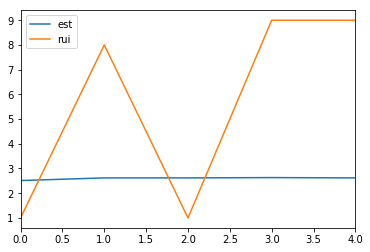

In [54]:
rcm_df.loc[rcm_df.uid == '(주)윌비스'][['est', 'rui']].reset_index(drop=True).plot()

In [25]:
user_company = '삼성전자(주)'
rows_list = []
for item_company in df.spl.drop_duplicates().to_list():
    dict_ = {'item_company': item_company, 'est': algo.predict(user_company, item_company).est}
    rows_list.append(dict_)
est_df = pd.DataFrame(rows_list)

In [26]:
est_df.sort_values('est')

,est,item_company
19684,1.449978,(주)스프링웨이브
19699,1.453503,(주)에이티케미칼
19706,1.484932,(주)위트
19930,1.504631,"USC ELECTRONICS (KOREA) CO.,LTD."
19829,1.515010,KITURAMIBUMYANG
14863,1.529948,주식회사 유비쿼스
19733,1.585669,(주)플랙트우즈코리아
12929,1.597092,(주)신성엔지니어링
20083,1.640066,한화테크윈(주)
19689,1.717692,(주)쓰리에이


In [ ]:
from collections import Counter

import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook
matplotlib.style.use('ggplot')

counter = Counter([r for (_, r) in trainset.ir[trainset.to_inner_iid('(주)현대화섬')]])
pd.DataFrame.from_dict(counter, orient='index').plot(kind='bar', legend=False)
plt.xlabel('Rating value')
plt.ylabel('Number of users')
plt.title('Number of users having rated item (주)현대화섬')

### TEST Rating before drop few ratings (trd_cnt)

In [ ]:
df.groupby('trd_cnt').agg('size').sum()

In [ ]:
df.groupby('trd_cnt').agg('size').loc[701:].sum()

In [ ]:
import sys
rating = {1:[1,1], 2:[2,2], 3:[3,4], 4:[5,7], 5:[8,12], 
          6:[13,23], 7:[24,50], 8:[51,160], 9:[161,700], 10:[701,sys.maxsize]}

In [ ]:
21477 + 13957 + 10439 + 6577 + 5284 + 4303 + 3603 + 2929 + 1634 + 589

In [ ]:
for i in rating:
    df.loc[(df.trd_cnt >= rating[i][0]) & (df.trd_cnt <= rating[i][1]), 'trd_cnt'] = i    

In [ ]:
df.head()

In [ ]:
df.groupby('trd_cnt').agg('size').plot.bar()

In [ ]:
df.head()

In [ ]:
df.groupby('byr').agg('size').sort_values(ascending=False)[:10].plot()

### Make Surprise Data from Dataframe

In [ ]:
reader = Reader(rating_scale=(1,10))

In [ ]:
data = Dataset.load_from_df(df, reader)

In [ ]:
from surprise.model_selection import cross_validate
bsl_options = {
    'method': 'als',
    'n_epochs': 5,
    'reg_u': 12,
    'reg_i': 5
}
algo = surprise.BaselineOnly(bsl_options)
cross_validate(algo, data)

## By AMT

In [ ]:
trade_df[['BYRORGNM1', 'SPLYORGNM1', 'AMT', 'CUR']].head()

In [ ]:
trade_df = trade_df[['BYRORGNM1', 'SPLYORGNM1', 'AMT', 'CUR']]

In [ ]:
trade_df.CUR.drop_duplicates()

In [ ]:
trade_df = trade_df.loc[(trade_df.CUR == "USD") | (trade_df.CUR == "KRW")]

In [ ]:
trade_df.loc[trade_df.CUR == 'USD'].head()

In [ ]:
trade_df.loc[trade_df.CUR == 'KRW'].head()

In [ ]:
def calculate_krw(amt: float, cur: str) -> float:
    if cur == 'KRW':
        return amt
    elif cur == 'USD':
        return amt * 1244

In [ ]:
trade_df['AMT_KRW'] = trade_df.apply(lambda x: calculate_krw(x['AMT'], x['CUR']), axis=1)

In [ ]:
trade_df.loc[[0, 35800]]

In [ ]:
df = trade_df[['SPLYORGNM1', 'BYRORGNM1', 'AMT_KRW']]

In [ ]:
df.head()

In [ ]:
df = df.groupby(['SPLYORGNM1', 'BYRORGNM1']).agg('sum').sort_values('AMT_KRW', ascending=False).reset_index()

In [ ]:
df.head()

In [ ]:
df.columns = ['spl', 'byr', 'krw']

In [ ]:
df.shape

In [ ]:
df_table = df.set_index(["spl", "byr"]).unstack()
df_table.shape

In [ ]:
plt.imshow(df_table)
plt.grid(False)
plt.xlabel("byr")
plt.ylabel("spl")
plt.title("Trade Matrix")
plt.show()

In [ ]:
list(df_table.index).index('POSCO')

In [ ]:
val = '주식회사 포스코대우'
[(index, row.index(val)) for index, row in enumerate(list(df_table.columns)) if val in row]

In [ ]:
df_table.iloc[13660:13670, 13740:13750]

In [ ]:
df_table.count(axis=1).sort_values(ascending=False)[:100].plot.box

In [ ]:
plt.imshow(df_table.loc[df_table.count(axis=1).sort_values(ascending=False)[:100].index])
plt.grid(False)
plt.xlabel("byr")
plt.ylabel("spl")
plt.title("Trade Matrix")
plt.show()

In [ ]:
plt.imshow(df_table.iloc[13660:13670, 13740:13750])
plt.grid(False)
plt.xlabel("byr")
plt.ylabel("spl")
plt.title("Trade Matrix")
plt.show()

In [ ]:
df_table.count(axis=0).sort_values(ascending=False)

## Make dataframe to surprise dataset

In [ ]:
df.krw.max()

In [ ]:
df.krw.min()

In [ ]:
from surprise import Reader
from surprise import Dataset

In [ ]:
reader = Reader(rating_scale)

In [ ]:
df.head()

In [ ]:
df.krw.max()

In [ ]:
reader=Reader(rating_scale=(0, 5))

In [ ]:
df

In [ ]:
df.krw = df.krw / df.krw.max() * 5.0

In [ ]:
data = Dataset.load_from_df(df[['spl', 'byr', 'krw']], reader=reader)

In [ ]:
data.raw_ratings

In [ ]:
from surprise.model_selection import KFold

bsl_options = {
    'method': 'als',
    'n_epochs': 500,
    'reg_u': 12,
    'reg_i': 5
}
algo = surprise.BaselineOnly(bsl_options)

np.random.seed(0)
acc = np.zeros(3)
cv = KFold(3)
for i, (trainset, testset) in enumerate(cv.split(data)):
    algo.fit(trainset)
    predictions = algo.test(testset)
    acc[i] = surprise.accuracy.rmse(predictions, verbose=True)
acc.mean()

In [ ]:
from surprise.model_selection import cross_validate

sim_options = {'name': 'msd'}
algo = surprise.KNNBasic(sim_options=sim_options)
cross_validate(algo, data)["test_mae"].mean()

In [ ]:
data_ml = surprise.Dataset.load_builtin('ml-100k')

In [ ]:
data.raw_ratings

In [ ]:
data_ml.raw_ratings

# Trade count

In [ ]:
df = trade_df[['BYRORGNM1', 'SPLYORGNM1']]

In [ ]:
df = df.groupby(['BYRORGNM1', 'SPLYORGNM1']).agg('size').reset_index()

In [ ]:
df.head()

In [ ]:
df.columns = ['byr', 'spl', 'trd_cnt']

In [ ]:
df.head()

In [ ]:
df.sort_values('trd_cnt').trd_cnt.reset_index(drop=True).plot()

In [ ]:
len(df.loc[df.trd_cnt < 3])

In [ ]:
len(df.loc[df.trd_cnt <= 14])

In [ ]:
df.sort_values('trd_cnt').trd_cnt.reset_index(drop=True)[35434:58914].plot.box()

In [ ]:
df.sort_values('trd_cnt').trd_cnt.reset_index(drop=True)[35434:58914].plot()

In [ ]:
df = df.sort_values('trd_cnt')[35434:58914].reset_index(drop=True)

In [ ]:
df.tail()

In [ ]:
df.groupby('spl').agg('size').sort_values().plot()

In [ ]:
df.groupby('spl').agg('size').sort_values().tail()

In [ ]:
df.groupby('spl').agg('size').plot.box()

In [ ]:
# refer: https://nbviewer.jupyter.org/github/NicolasHug/Surprise/blob/master/examples/notebooks/KNNBasic_analysis.ipynb